In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
df = pd.read_csv('/Users/vijayc/Downloads/US_Housing_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
sum(df.duplicated())

0

In [3]:
emptyCount_PerFeature = df.isna().sum()
emptyCountPercent_PerFeature = (emptyCount_PerFeature / len(df)) * 100
nonZero_emptyCountPercent_PerFeature = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 0]
rounded_Percent = np.round(nonZero_emptyCountPercent_PerFeature)
print(rounded_Percent)

LotFrontage      18.0
Alley            94.0
MasVnrType       60.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


In [7]:
# Drop columns that are with more than 59% of NaN values and call that as ddf
features_to_drop = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 59].index
ddf = df.drop(columns=features_to_drop)
ddf.shape

(1460, 76)

In [9]:
emptyCount_PerFeature = df.isna().sum()
emptyCountPercent_PerFeature = (emptyCount_PerFeature / len(df)) * 100
nonZero_emptyCountPercent_PerFeature = emptyCountPercent_PerFeature[emptyCountPercent_PerFeature > 0]
rounded_Percent = np.round(nonZero_emptyCountPercent_PerFeature)
print(rounded_Percent)

LotFrontage      18.0
Alley            94.0
MasVnrType       60.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


<Axes: >

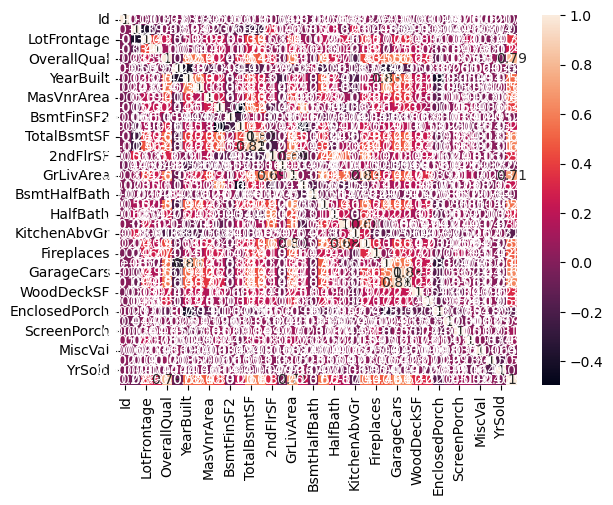

In [11]:
correlation = ddf.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

In [12]:
categorical_columns_ddf = ddf.select_dtypes(['object']).columns
for column in categorical_columns_ddf:
    print(f"Unique values in column {column}: {ddf[column].unique()}")
print(f"Total categorical column in dataset is: {len(categorical_columns_ddf)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column Street: ['Pave' 'Grvl']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column Utilities: ['AllPub' 'NoSeWa']
Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in column Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values

In [15]:
# Remove catorigical columns that has more than 5 unique values from ddf dataframe and call that as cdf
features_5_to_drop = [col for col in categorical_columns_ddf if df[col].nunique() > 5]
cdf = ddf.drop(columns=features_5_to_drop)
cdf.shape

(1460, 60)

In [17]:
categorical_columns_cdf = cdf.select_dtypes(['object']).columns
for column in categorical_columns_cdf:
    print(f"Unique values in column {column}: {cdf[column].unique()}")
print(f"Total categorical column in cdf dataset is: {len(categorical_columns_cdf)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column Street: ['Pave' 'Grvl']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column Utilities: ['AllPub' 'NoSeWa']
Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in column BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in column BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in column HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values in column CentralAir: ['Y' 'N']
Unique values in column Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Unique valu

In [19]:
# Applying Ordinal encoding techniques for some of the Caterogical data columns
# Unique values in column Street: ['Pave' 'Grvl']
Street_map = {"Grvl": 0, "Pave": 1}
cdf['Street'] = cdf['Street'].map(Street_map)

# Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LotShape_map = {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}
cdf['LotShape'] = cdf['LotShape'].map(LotShape_map)

# Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour_map = {"Low": 0, "Lvl": 1, "Bnk": 2, "HLS": 3}
cdf['LandContour'] = cdf['LandContour'].map(LandContour_map)

# Unique values in column Utilities: ['AllPub' 'NoSeWa']
Utilities_map = {"NoSeWa": 0, "AllPub": 1}
cdf['Utilities'] = cdf['Utilities'].map(Utilities_map)

# Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig_map = {"Inside": 0, "FR2": 1, "FR3": 2, "Corner":3, "CulDSac":4}
cdf['LotConfig'] = cdf['LotConfig'].map(LotConfig_map)

In [21]:
#rdf['LotShape'].unique()
categorical_columns_after_encoding = cdf.select_dtypes(['object']).columns
for column in categorical_columns_after_encoding:
    print(f"Unique values in column {column}: {cdf[column].unique()}")
print(f"Total categorical column in cdf dataset after encoding is: {len(categorical_columns_after_encoding)}")

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in column BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in column BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in column HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Unique values in column CentralAir: ['Y' 'N']
Unique values in column Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Unique values in column KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values in column GarageFinish: ['RFn' 'Unf' 'Fin' nan]
Unique values in column GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values in column GarageCond: ['TA' 'Fa' nan 'Gd' 'P

In [23]:
numerical_columns_cdf = cdf.select_dtypes(['int64', 'float64']).columns
print(f"Total numerical column in cdf dataset is: {len(numerical_columns_cdf)}")

Total numerical column in cdf dataset is: 43


<Axes: >

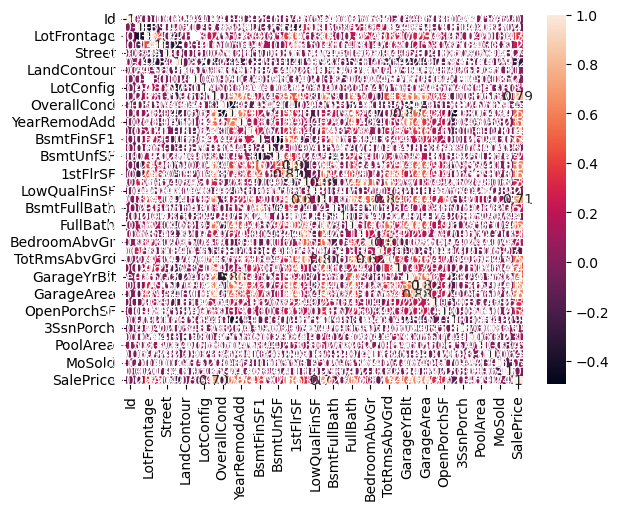

In [25]:
correlation_cdf = cdf.corr(numeric_only = True)
sns.heatmap(correlation_cdf, annot = True)

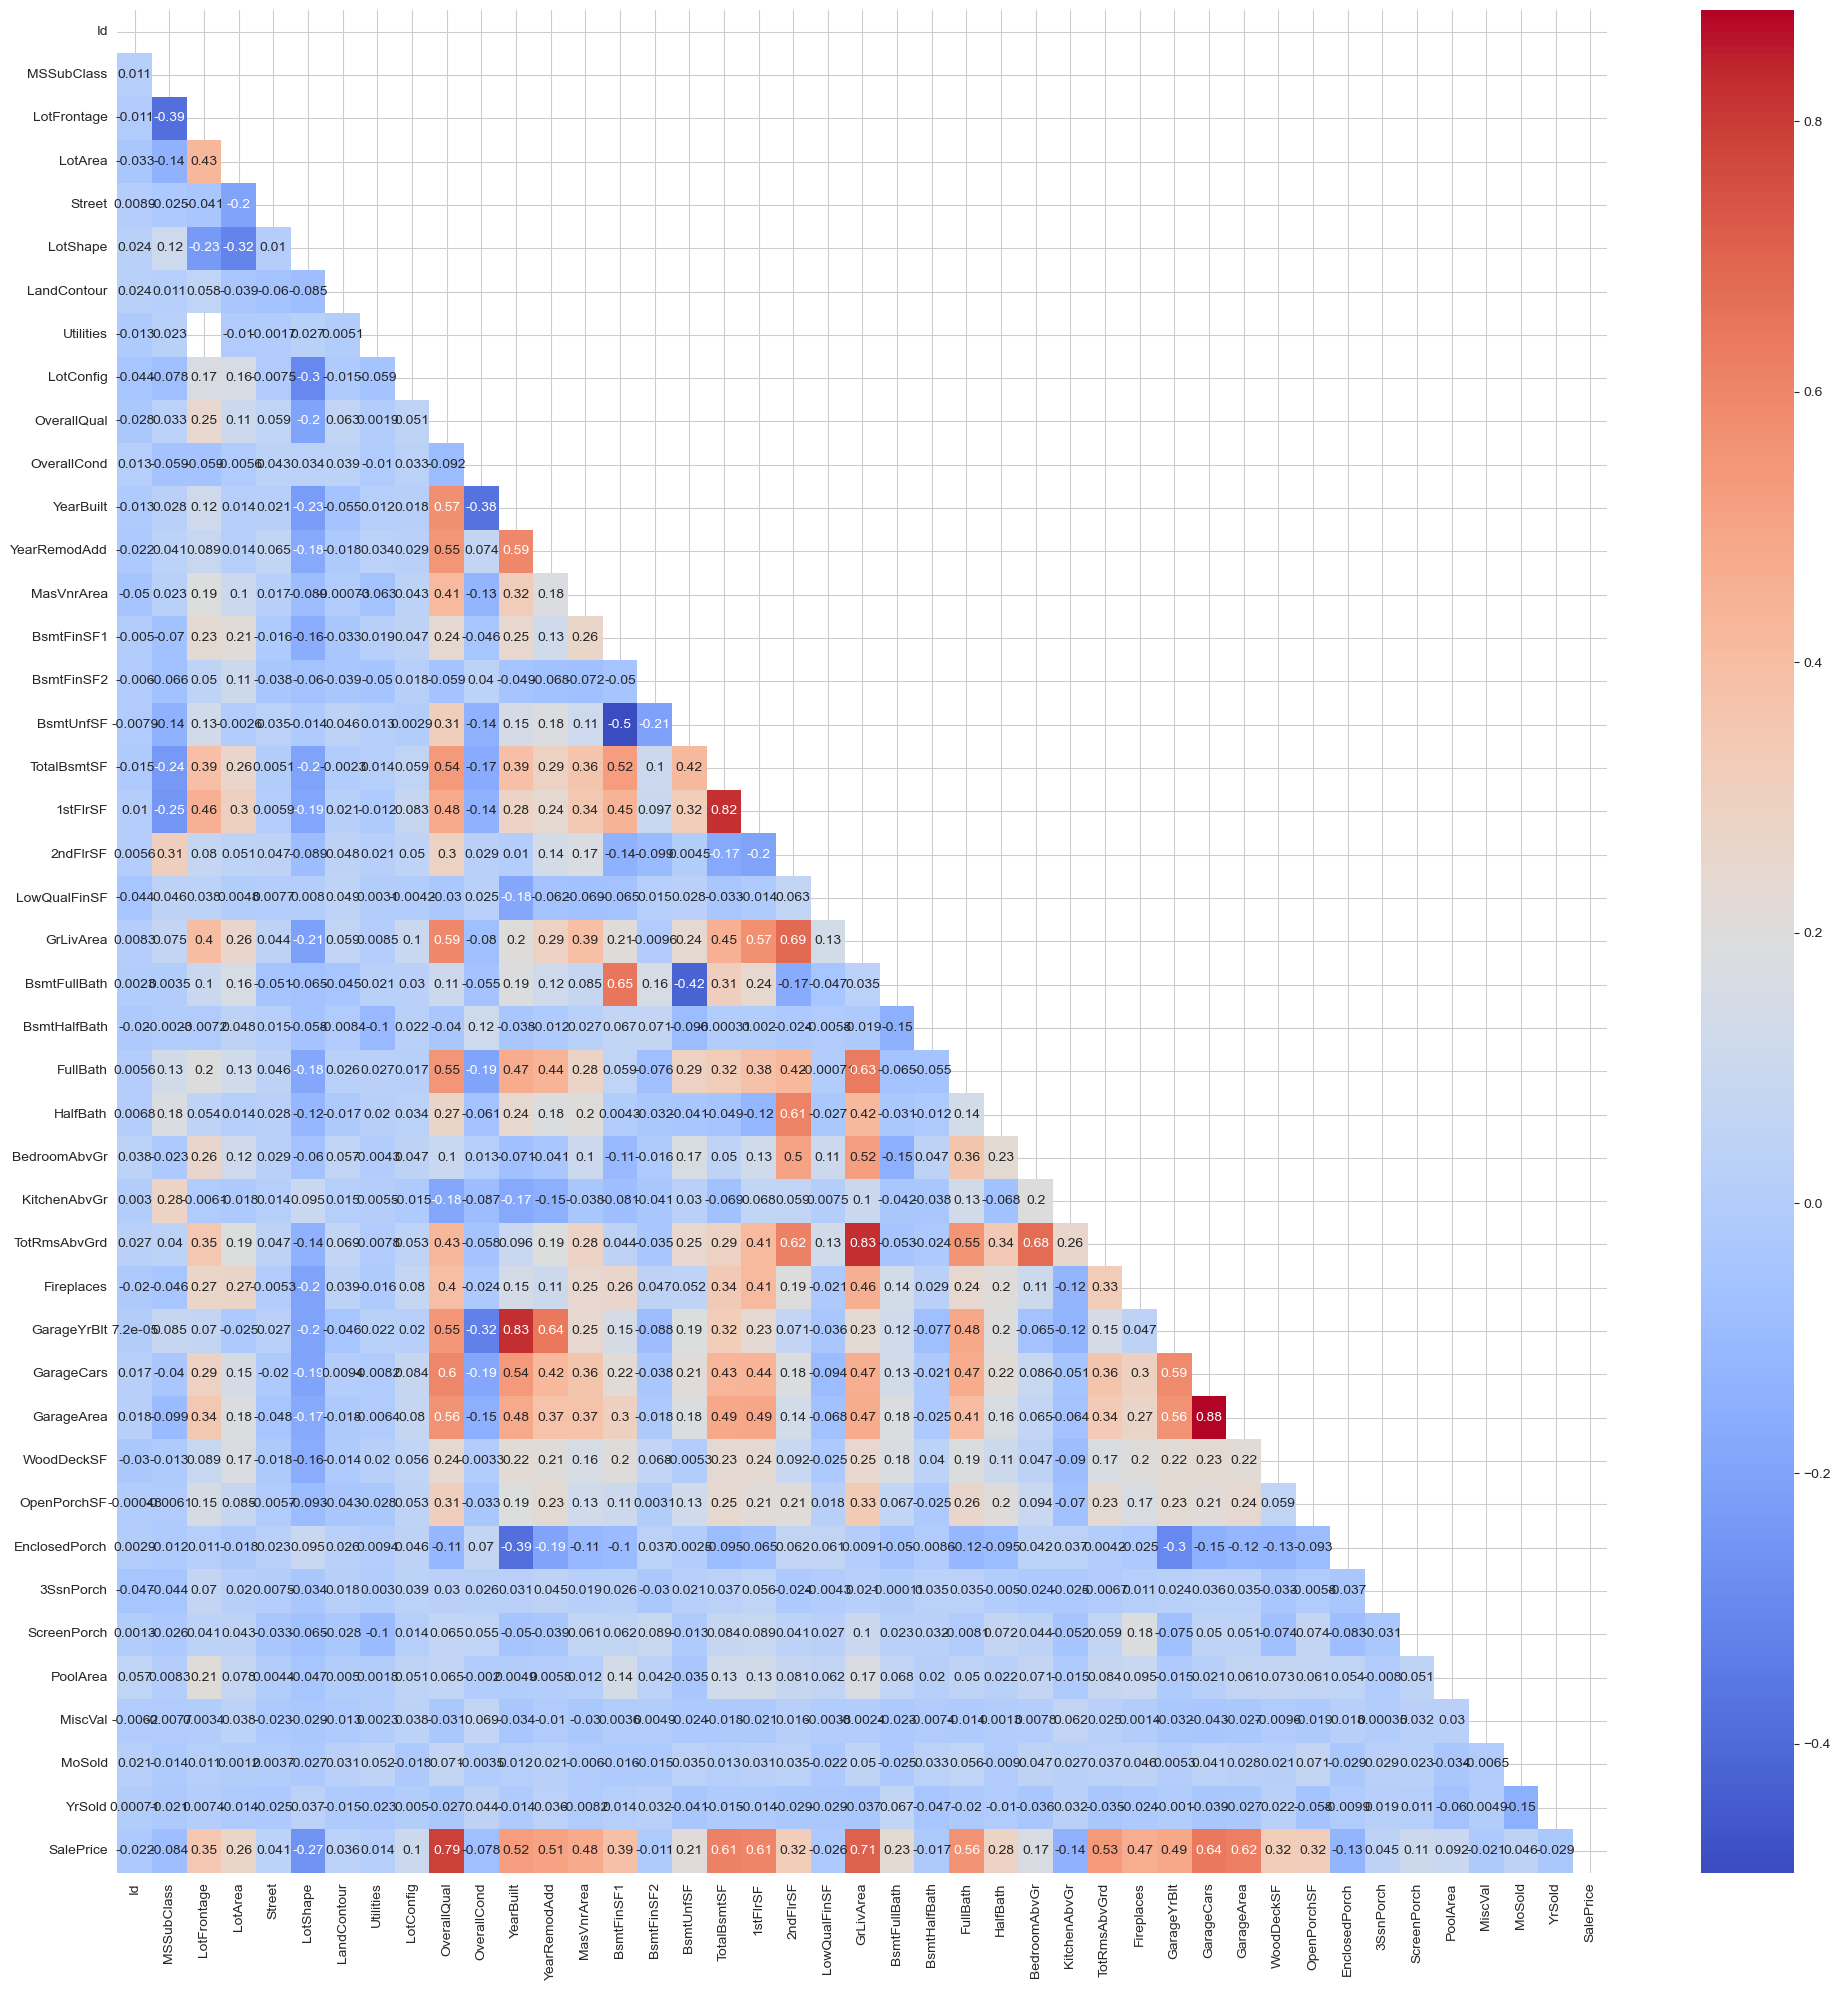

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = cdf[numerical_columns_cdf].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

In [28]:
cdf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,1,3,1,1,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,1,3,1,1,1,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,1,2,1,1,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,1,2,1,1,3,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,1,2,1,1,1,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,RL,85.0,14115,1,2,1,1,0,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,RL,75.0,10084,1,3,1,1,0,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,RL,NaN,10382,1,2,1,1,3,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,RM,51.0,6120,1,3,1,1,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,RL,50.0,7420,1,3,1,1,3,...,0,4,0,0,0,0,0,1,2008,118000


In [31]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  MasVnrArea     1452 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [34]:
cdf['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
cdf['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
cdf['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])


cdf['LotFrontage'] = cdf['LotFrontage'].fillna(cdf['LotFrontage'].mean())
cdf['MasVnrArea'] = cdf['MasVnrArea'].fillna(cdf['MasVnrArea'].mean())

cdf['FireplaceQu'] = cdf['FireplaceQu'].ffill()
cdf['GarageFinish'] = cdf['GarageFinish'].ffill()

cdf['GarageQual'] = cdf['GarageQual'].bfill()
cdf['GarageCond'] = cdf['GarageCond'].ffill()


cdf['GarageYrBlt'] = cdf['GarageYrBlt'].fillna(cdf['YearBuilt'])



cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [37]:
from sklearn.preprocessing import OrdinalEncoder
ccdf = pd.DataFrame(OrdinalEncoder().fit_transform(cdf[categorical_columns_cdf]), columns=categorical_columns_cdf)

In [39]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   float64
 1   Street        1460 non-null   float64
 2   LotShape      1460 non-null   float64
 3   LandContour   1460 non-null   float64
 4   Utilities     1460 non-null   float64
 5   LotConfig     1460 non-null   float64
 6   LandSlope     1460 non-null   float64
 7   BldgType      1460 non-null   float64
 8   ExterQual     1460 non-null   float64
 9   ExterCond     1460 non-null   float64
 10  BsmtQual      1460 non-null   float64
 11  BsmtCond      1460 non-null   float64
 12  BsmtExposure  1460 non-null   float64
 13  HeatingQC     1460 non-null   float64
 14  CentralAir    1460 non-null   float64
 15  Electrical    1460 non-null   float64
 16  KitchenQual   1460 non-null   float64
 17  FireplaceQu   1459 non-null   float64
 18  GarageFinish  1460 non-null 

<Axes: >

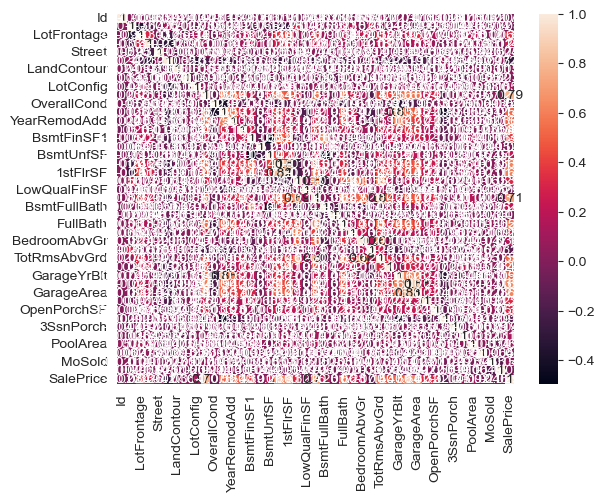

In [41]:
correlation_cdf = cdf.corr(numeric_only = True)
sns.heatmap(correlation_cdf, annot = True)

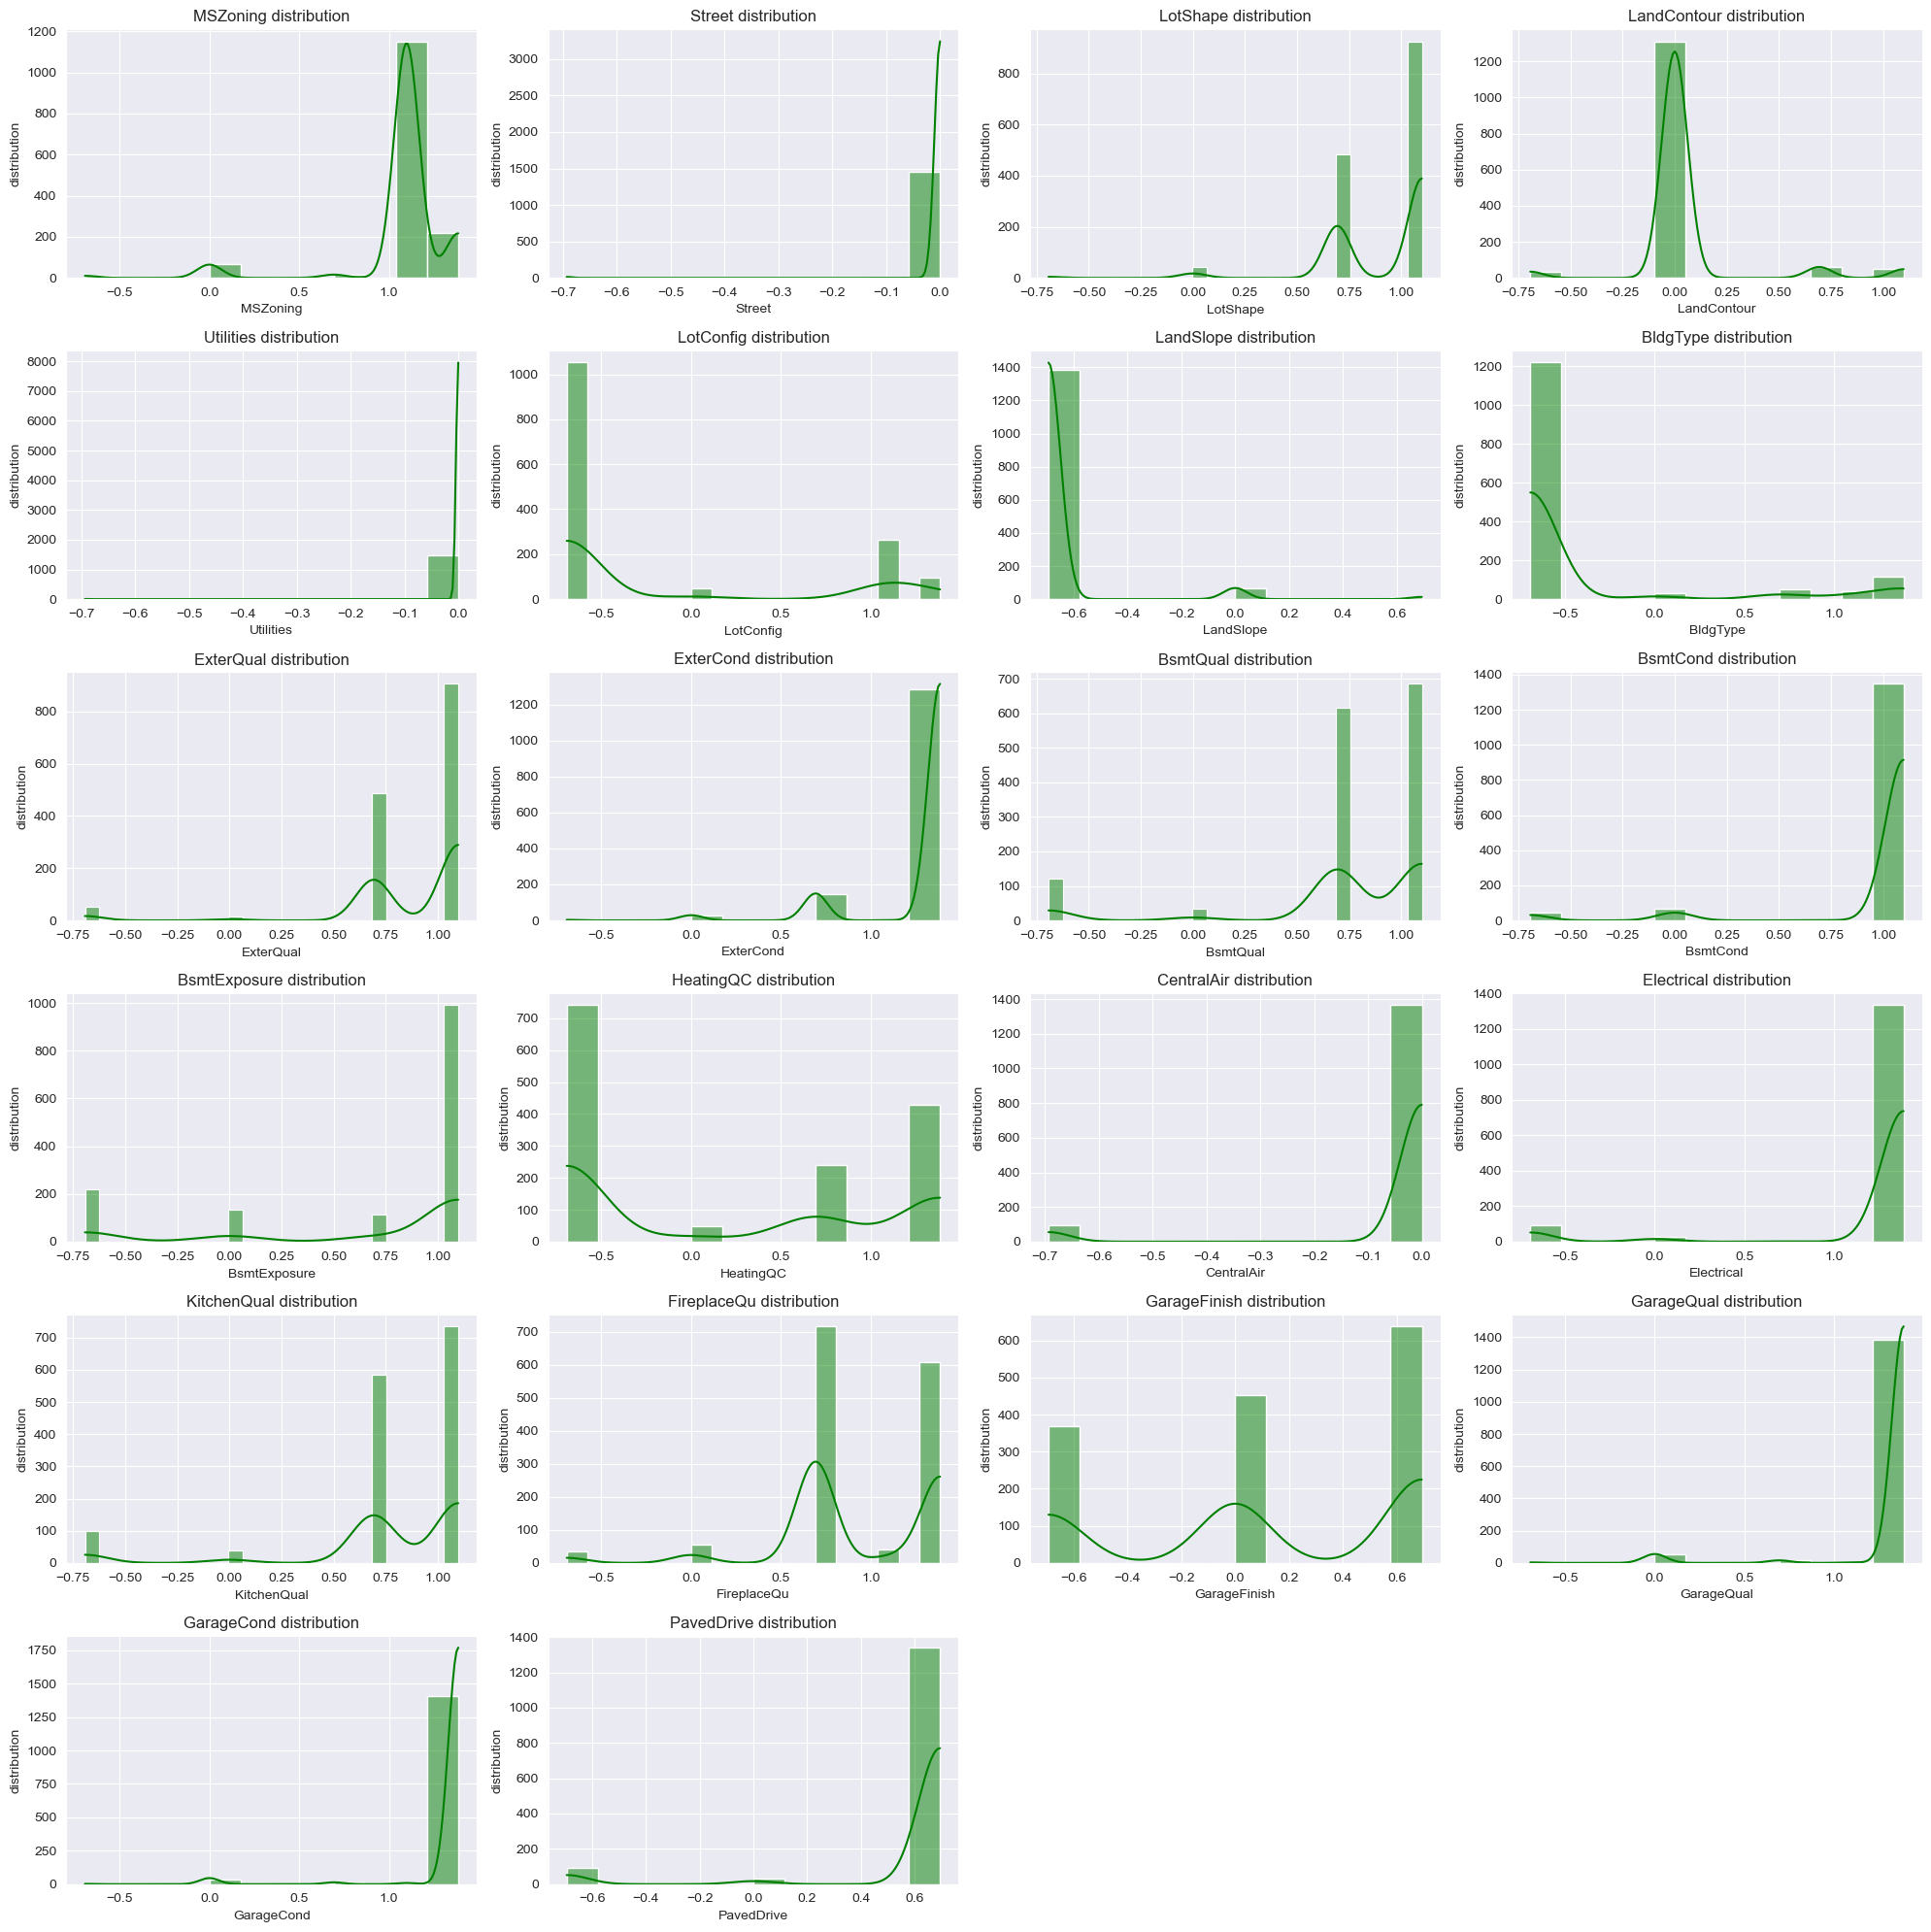

In [43]:
import math
sns.set_style('darkgrid')
numerical_columns_ccdf = ccdf.select_dtypes(['int64', 'float64']).columns
np.seterr(divide='ignore', invalid='ignore')
total_plots = len(numerical_columns_ccdf)
rows = math.ceil(total_plots / 4)
cols = 4

plt.figure(figsize=(20,20))
for index, feature in enumerate(numerical_columns_ccdf):
    plt.subplot(rows, cols, index + 1)
    #plt.subplot(6,4,index+1)
    #sns.histplot(np.where(ccdf[feature]==0,np.log(ccdf[feature]+0.5),np.log(ccdf[feature])),kde=True, color='g')
    feature_data = np.where(ccdf[feature] == 0, np.log(ccdf[feature] + 0.5), np.log(ccdf[feature]))
    # Plotting the histogram with KDE
    sns.histplot(feature_data, kde=True, color='g')
    plt.xlabel(feature)
    plt.ylabel('distribution')
    plt.title(f"{feature} distribution")

plt.tight_layout()